In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pickle

In [85]:
df = pd.read_csv('ipl.csv')

In [61]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [86]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [87]:
columns_to_remove = ['mid','venue','batsman', 'bowler','striker','non-striker']
df.drop(columns_to_remove,axis=1,inplace=True)

In [88]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
76009,2017-05-21,Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,2017-05-21,Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,2017-05-21,Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,2017-05-21,Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129


In [89]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [90]:
consistent_teams =['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians','Kings XI Punjab',
                   'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [91]:
df=df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [92]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [93]:
df = df[df['overs']>=5.0]

In [94]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [95]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [96]:
#We have to convert the 'date' column to datetime format from string
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
df['date'].head()

32   2008-04-18
33   2008-04-18
34   2008-04-18
35   2008-04-18
36   2008-04-18
Name: date, dtype: datetime64[ns]

In [98]:
encoded_df = pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [99]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [100]:
#from sklearn.model_selection import train_test_split

In [103]:
#Spliting the data based on date info which we have!Called as timeseries!

In [104]:
X_train = encoded_df.drop('total',axis=1)[encoded_df['date'].dt.year <=2016]
X_test  = encoded_df.drop('total',axis=1)[encoded_df['date'].dt.year >=2017]

In [105]:
y_train = encoded_df[encoded_df['date'].dt.year <=2016]['total'].values
y_test  = encoded_df[encoded_df['date'].dt.year >=2017]['total'].values

In [107]:
X_train.drop('date',axis=1,inplace=True)
X_test.drop('date',axis=1,inplace=True)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
regressor = LinearRegression()

In [112]:
regressor.fit(X_train,y_train)

LinearRegression()

In [113]:
#Creating a pickle file
filename = 'ipl_score_predictor_pickle.pkl'
pickle.dump(regressor,open(filename,'wb'))

In [114]:
predict = regressor.predict(X_test)

In [115]:
predict

array([172.07093429, 175.2197967 , 174.61607874, ..., 100.37504751,
        99.80473879,  93.14382211])

In [116]:
pd.DataFrame({'Actual_values':y_test,'Predicted_values':predict})

,Actual_values,Predicted_values
0,207,172.070934
1,207,175.219797
2,207,174.616079
3,207,177.764941
4,207,180.930508
...,...,...
2773,107,100.669395
2774,107,100.995470
2775,107,100.375048
2776,107,99.804739


In [137]:
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predict)))


MAE: 12.118617546193244
MSE: 251.0079231041727
RMSE: 15.843229566732052


# Using Ridge Regression

In [118]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [119]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)

In [120]:
ridge_regressor.fit(X_train,y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.89586e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.50306e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58475e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.54634e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.55239e-18): result may not 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [143]:
print(ridge_regressor.best_estimator_)
print(ridge_regressor.best_score_)

Ridge(alpha=40)
-328.4152792487923


In [126]:
predict_ridge = ridge_regressor.predict(X_test)

In [147]:
pd.DataFrame({'Actual_values':y_test,'Predicted_values':predict_ridge})

,Actual_values,Predicted_values
0,207,172.049767
1,207,175.200220
2,207,174.595383
3,207,177.745836
4,207,180.912305
...,...,...
2773,107,100.708631
2774,107,101.034609
2775,107,100.413756
2776,107,99.840951


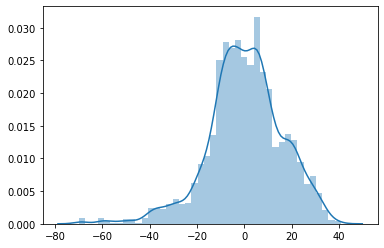

In [150]:
sns.distplot(y_test-predict_ridge)

In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [136]:
print('MAE:',mean_absolute_error(y_test,predict_ridge))
print('MSE:',mean_squared_error(y_test,predict_ridge))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predict_ridge)))


MAE: 12.11729452700503
MSE: 251.0317296411268
RMSE: 15.84398086470464


# Lasso Regression 

In [138]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [139]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)

In [140]:
lasso_regressor.fit(X_train,y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4538701.496951819, tolerance: 2529.955696594559
  positive)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4481863.125082216, tolerance: 2547.038071028663
  positive)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653945.245674724, tolerance: 2667.8126904366472
  positive)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [144]:
print(lasso_regressor.best_estimator_)
print(lasso_regressor.best_score_)

Lasso(alpha=1)
-320.82214916809124


In [145]:
predict_lasso = lasso_regressor.predict(X_test)

In [148]:
pd.DataFrame({'Actual_values':y_test,'Predicted_values':predict_lasso})

,Actual_values,Predicted_values
0,207,170.865810
1,207,174.254306
2,207,173.475154
3,207,176.863651
4,207,180.150541
...,...,...
2773,107,106.223798
2774,107,106.537361
2775,107,105.859815
2776,107,104.877452


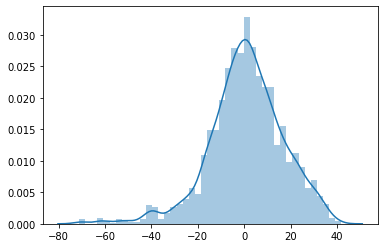

In [149]:
sns.distplot(y_test-predict_lasso)

In [151]:
print('MAE:',mean_absolute_error(y_test,predict_lasso))
print('MSE:',mean_squared_error(y_test,predict_lasso))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predict_lasso)))


MAE: 12.213583996827493
MSE: 262.36538279606964
RMSE: 16.19769683615759
